In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

In [20]:
# !pip install annoy
import numpy as np
import matplotlib.pyplot as plt
import annoy

In [21]:
subsample_size = 1000

embeddings = np.load('embeddings_v2.npy', allow_pickle=True).squeeze()[:subsample_size]
labels = np.load('labels_v2.npy', allow_pickle=True)[:subsample_size]

embedding_size = embeddings.shape[1]
print(embeddings.shape)

(1000, 1024)


In [22]:
from annoy import AnnoyIndex

t = AnnoyIndex(embedding_size, 'angular')
t.verbose(True)

# add the user embeddings to annoy (your annoy userids will be the row indexes)
for sample_id, embedding in enumerate(embeddings):
    t.add_item(sample_id, embedding)

In [23]:
# build the forrest
%time t.build(10) # 10 trees

Wall time: 18 ms


True

In [24]:
t.unbuild()

True

In [25]:
t.add_item(1001 ,embeddings[0])

In [26]:
t.build(10)

True

In [ ]:
# save the forest for later if you're using this again and don't want to rebuild the trees every time
t.save('test.ann')

In [27]:
# find the 100 nearest neighbor users
%time neighbors = t.get_nns_by_item([1, 2], 100) 

TypeError: an integer is required (got type list)

In [20]:
help(t.add_item)

Help on built-in function add_item:

add_item(...) method of annoy.Annoy instance
    Adds item `i` (any nonnegative integer) with vector `v`.
    
    Note that it will allocate memory for `max(i)+1` items.



In [21]:
t.add_item(embeddings)

TypeError: only size-1 arrays can be converted to Python scalars

In [24]:
t.verbose(True)

True

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
full_embeddings = np.load('embeddings_v4.npy', allow_pickle=True).squeeze()
full_labels = np.load('labels_v4.npy', allow_pickle=True)

full_embeddings.shape

(79935, 1024)

In [2]:
from ann_utils import ANN

In [253]:
ann = ANN('embeddings_v4.npy', 'labels_v4.npy', len(full_labels))

In [8]:
ann.add_reindex(full_embeddings[1000:1002])

In [9]:
ann.annoy_index.get_n_items()

1002

In [10]:
full_labels == full_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
def supervised_evaluation(predictions, labels):
        '''
        see if labels assigned by voting really match closest neighbors 
        '''
        return f'classification acc: {100 * np.round(np.sum(predictions==labels) / len(labels), 2)}%'

In [18]:
supervised_evaluation(full_labels, full_labels)

'classification acc: 100.0%'

In [112]:
x1, _ = t.get_nns_by_vector(full_embeddings[20], 100, include_distances=True)

In [113]:
full_labels[20]

1

In [277]:
%time from sklearn.neighbors import KNeighborsClassifier
%time neigh = KNeighborsClassifier(n_neighbors=30)
%time neigh.fit(full_embeddings, full_labels)
# %time k_neighbors = neigh.kneighbors(single_test_vector['embeddings'].reshape(-1, embedding_size), return_distance=False)

Wall time: 0 ns
Wall time: 0 ns
Wall time: 51.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [1]:
%load_ext autoreload
%autoreload 2
from ann_utils import ANN

In [7]:
ann_v4 = ANN('embeddings_v4.npy', 'labels_v4.npy', len(full_labels))
ann_v4.supervised_evaluation()

classification acc: 60.0% 
top_2 classification acc: 83.0%


lol


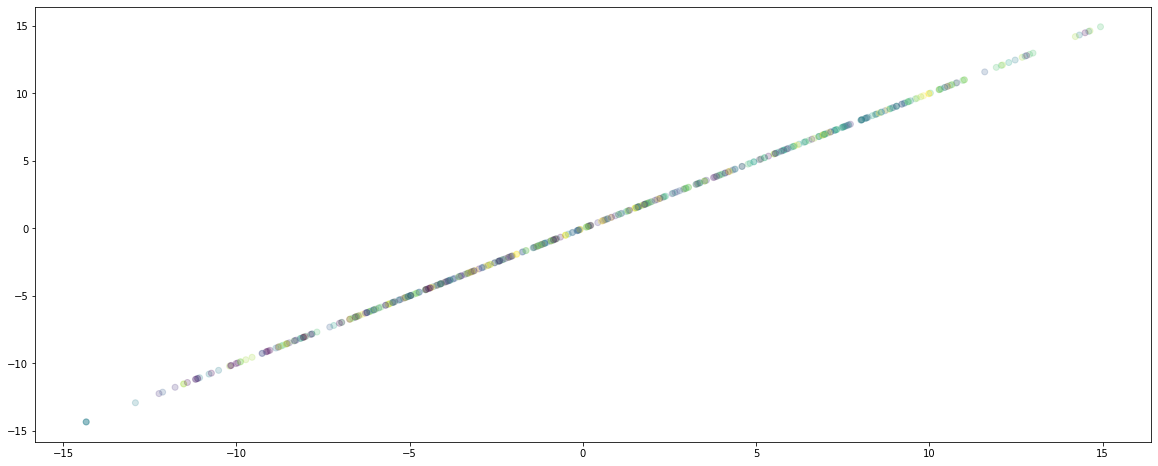

In [9]:
ann_v4.plot_tsne(size=500)

In [ ]:
ann_v5 = ANN('embeddings_v5.npy', 'labels_v5.npy', -1)
ann_v5.supervised_evaluation()

working on TSNE. Might take a while


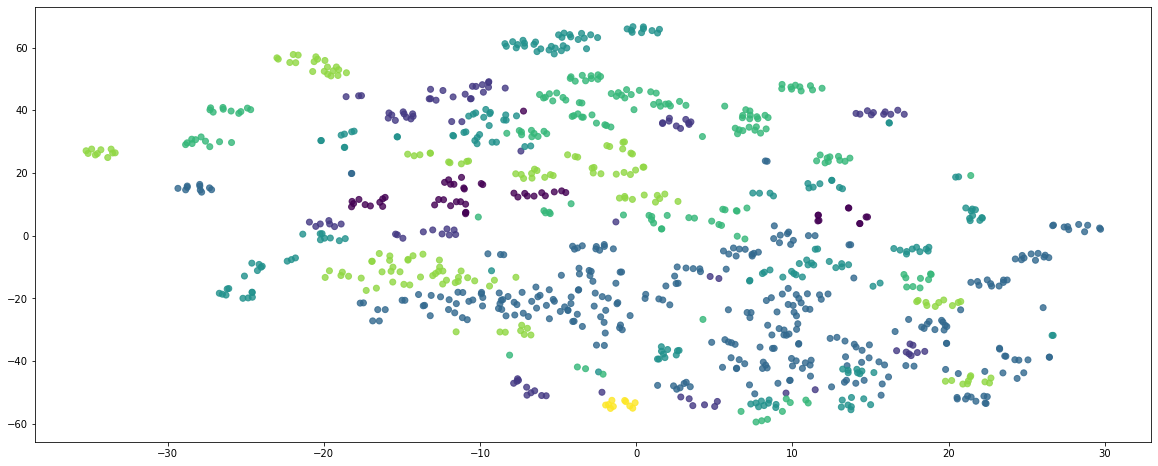

In [7]:
ann_v5.plot_tsne(1000)

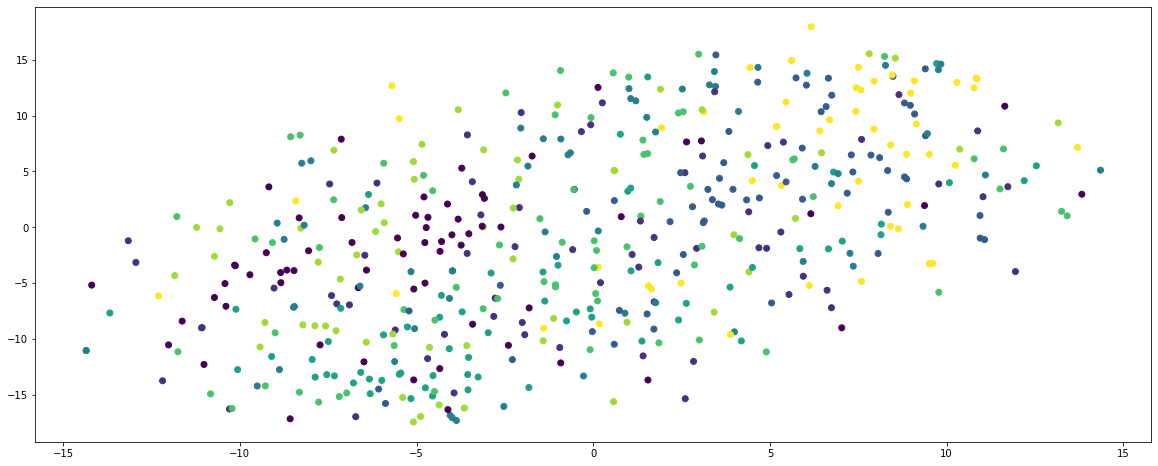

In [14]:
plt.figure(figsize=(20,8))
plt.scatter(ann_v5.tsne_output[:,0], ann_v5.tsne_output[:,1], c=ann_v5.labels_tsne, alpha=1.2)
plt.show()

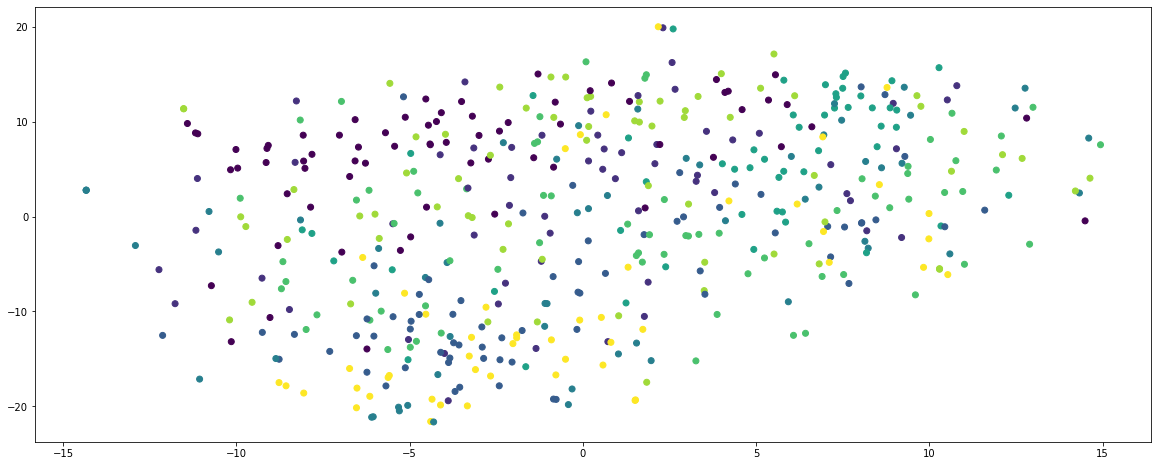

In [15]:
plt.figure(figsize=(20,8))
plt.scatter(ann_v4.tsne_output[:,0], ann_v4.tsne_output[:,1], c=ann_v4.labels_tsne, alpha=1.2)
plt.show()

In [ ]:
ann